In [63]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [64]:
rev = pd.read_csv('datasets/revenue_to_provider.csv')

In [65]:
rev

,year,state_code,industry_sector,residential,commercial,industrial,transportation,other,total
0,2017,AK,Total Electric Industry,438240.0,510932.0,232117.0,0.0,NaN,1181289.0
1,2017,AL,Total Electric Industry,3786699.0,2637503.0,2052257.0,0.0,NaN,8476458.0
2,2017,AR,Total Electric Industry,1749676.0,1013943.0,1041103.0,48.0,NaN,3804770.0
3,2017,AZ,Total Electric Industry,4259275.0,3115269.0,884209.0,730.0,NaN,8259483.0
4,2017,CA,Total Electric Industry,16500848.0,18552245.0,6189685.0,72460.0,NaN,41315237.0
5,2017,CO,Total Electric Industry,2264556.0,2041429.0,1163087.0,7144.0,NaN,5476216.0
6,2017,CT,Total Electric Industry,2512033.0,1981398.0,424986.0,19380.0,NaN,4937798.0
7,2017,DC,Total Electric Industry,309764.0,933369.0,14826.0,29842.0,NaN,1287801.0
8,2017,DE,Total Electric Industry,622385.0,413794.0,177390.0,0.0,NaN,1213569.0
9,2017,FL,Total Electric Industry,14097730.0,8881601.0,1299364.0,7443.0,NaN,24286139.0


In [66]:
rev.head()

,year,state_code,industry_sector,residential,commercial,industrial,transportation,other,total
0,2017,AK,Total Electric Industry,438240.0,510932.0,232117.0,0.0,NaN,1181289.0
1,2017,AL,Total Electric Industry,3786699.0,2637503.0,2052257.0,0.0,NaN,8476458.0
2,2017,AR,Total Electric Industry,1749676.0,1013943.0,1041103.0,48.0,NaN,3804770.0
3,2017,AZ,Total Electric Industry,4259275.0,3115269.0,884209.0,730.0,NaN,8259483.0
4,2017,CA,Total Electric Industry,16500848.0,18552245.0,6189685.0,72460.0,NaN,41315237.0


In [67]:
rev[rev["industry_sector"].str.endswith("Industry")]

,year,state_code,industry_sector,residential,commercial,industrial,transportation,other,total
0,2017,AK,Total Electric Industry,438240.0,510932.0,232117.0,0.0,NaN,1181289.0
1,2017,AL,Total Electric Industry,3786699.0,2637503.0,2052257.0,0.0,NaN,8476458.0
2,2017,AR,Total Electric Industry,1749676.0,1013943.0,1041103.0,48.0,NaN,3804770.0
3,2017,AZ,Total Electric Industry,4259275.0,3115269.0,884209.0,730.0,NaN,8259483.0
4,2017,CA,Total Electric Industry,16500848.0,18552245.0,6189685.0,72460.0,NaN,41315237.0
5,2017,CO,Total Electric Industry,2264556.0,2041429.0,1163087.0,7144.0,NaN,5476216.0
6,2017,CT,Total Electric Industry,2512033.0,1981398.0,424986.0,19380.0,NaN,4937798.0
7,2017,DC,Total Electric Industry,309764.0,933369.0,14826.0,29842.0,NaN,1287801.0
8,2017,DE,Total Electric Industry,622385.0,413794.0,177390.0,0.0,NaN,1213569.0
9,2017,FL,Total Electric Industry,14097730.0,8881601.0,1299364.0,7443.0,NaN,24286139.0


In [68]:
rev["industry_sector"].unique()

array(['Total Electric Industry', 'Full-Service Providers',
       'Restructured Retail Service Providers', 'Energy-Only Providers',
       'Delivery-Only Service'], dtype=object)

In [69]:
rev["state_code"].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'US', nan], dtype=object)

In [101]:
rev.dropna(subset=["state_code"], inplace=True)

In [118]:
fullservice = rev.loc[(rev["state_code"] == "AR")]

In [119]:
fullservice

,year,state_code,industry_sector,residential,commercial,industrial,transportation,other,total
2,2017,AR,Total Electric Industry,1749676.0,1013943.0,1041103.0,48.0,NaN,3804770.0
54,2017,AR,Full-Service Providers,1749676.0,1013943.0,1041103.0,48.0,NaN,3804770.0
169,2016,AR,Total Electric Industry,1764930.0,1002233.0,986087.0,44.0,NaN,3753295.0
221,2016,AR,Full-Service Providers,1764930.0,1002233.0,986087.0,44.0,NaN,3753295.0
336,2015,AR,Total Electric Industry,1794303.0,1011199.0,998757.0,49.0,NaN,3804308.0
388,2015,AR,Full-Service Providers,1794303.0,1011199.0,998757.0,49.0,NaN,3804308.0
503,2014,AR,Total Electric Industry,1753284.0,964795.0,1002428.0,49.0,NaN,3720556.0
555,2014,AR,Full-Service Providers,1753284.0,964795.0,1002428.0,49.0,NaN,3720556.0
670,2013,AR,Total Electric Industry,1746489.0,957321.0,999852.0,48.0,NaN,3703711.0
722,2013,AR,Full-Service Providers,1746489.0,957321.0,999852.0,48.0,NaN,3703711.0


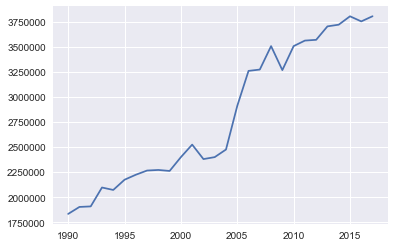

In [103]:
plt.plot(fullservice['year'].values, fullservice['total'].values)

In [112]:
states = {"AZ": 2006, "CA": 2002, "CO": 2004, "CT": 1998, "DE": 2005, "HI": 2001, "IL": 2007, "IN": 2011, "IA": 1983, "KS": 2009, "ME": 1999, "MD": 2004, "MA": 1997, "MI": 2008, "MN": 2007, "MO": 2007, "MT": 2005, "NV": 1997, "NH": 2007, "NJ": 1991, "NM": 2002, "NY": 2004, "NC": 2007, "ND": 2007, "OH": 2008, "OK": 2010, "OR": 2007, "PA": 2004, "RI": 2004, "SC": 2014, "SD": 2008, "TX": 1999, "UT": 2008, "VA": 2007, "WA": 2006, "WV": 2009, "WI": 1998, "DC": 2005}

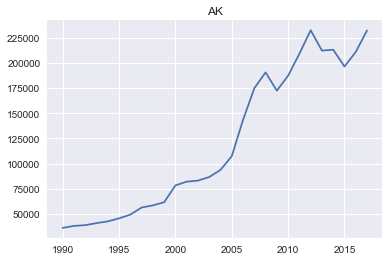

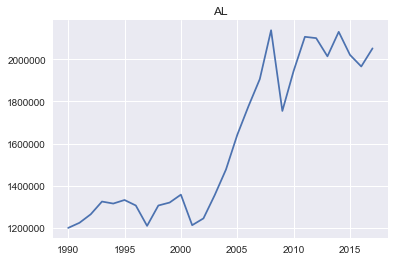

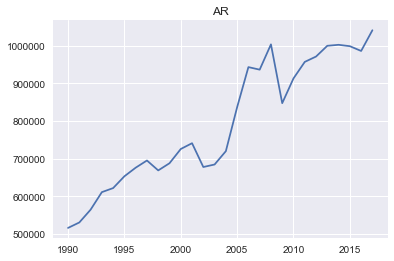

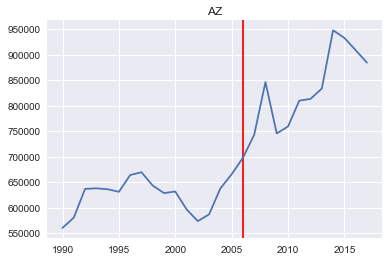

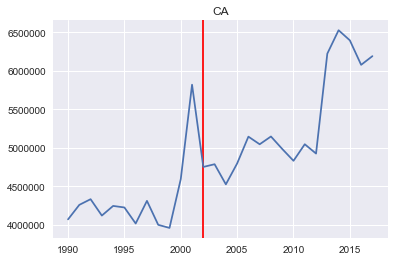

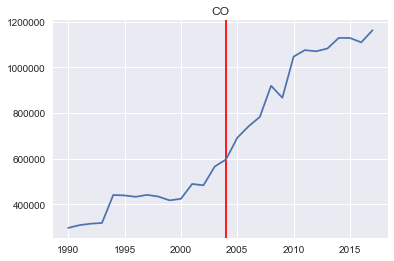

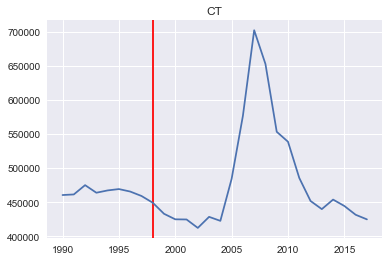

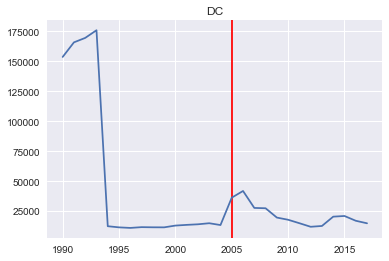

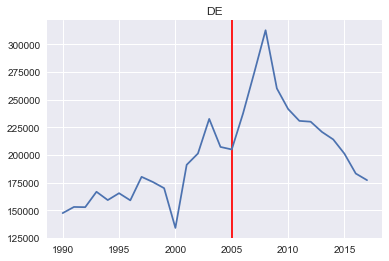

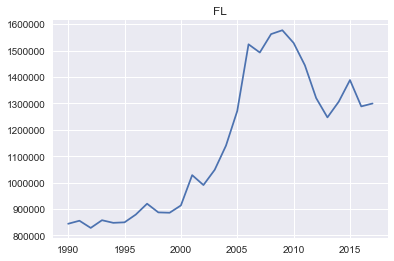

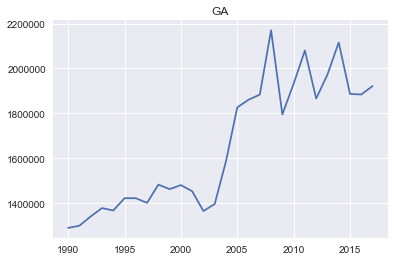

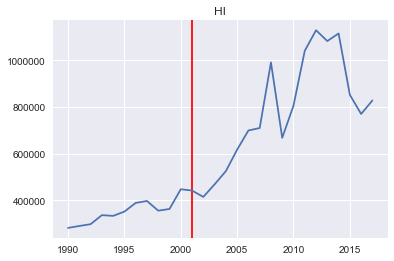

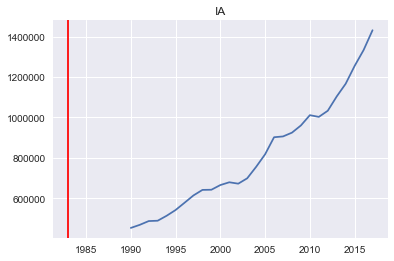

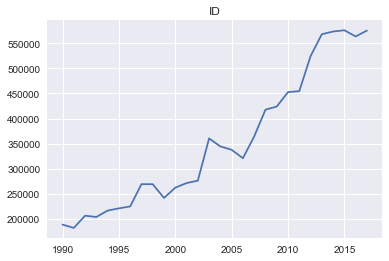

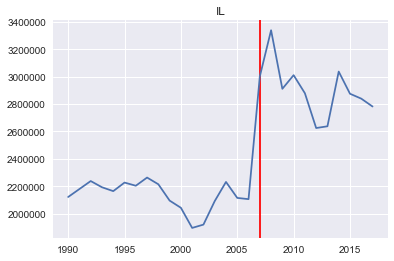

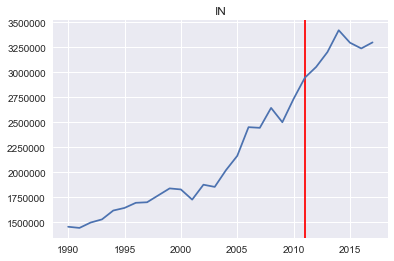

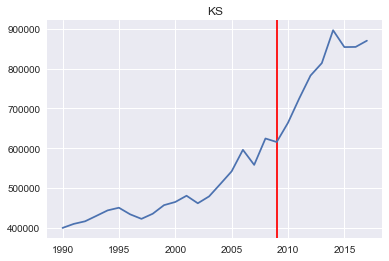

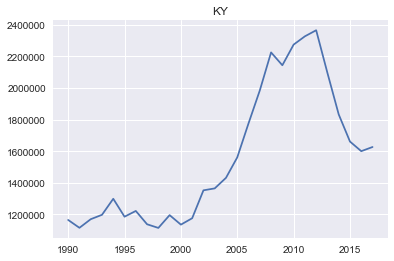

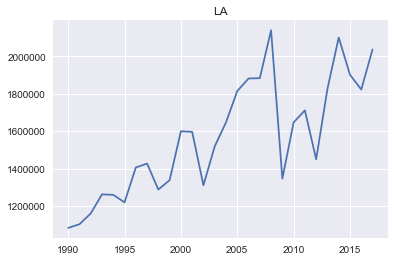

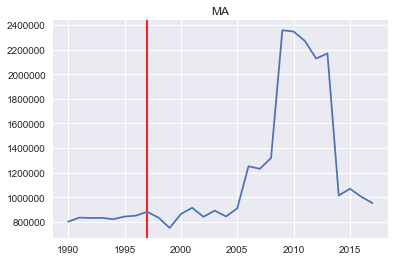

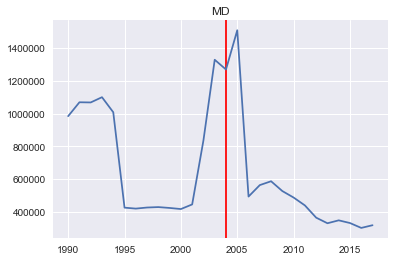

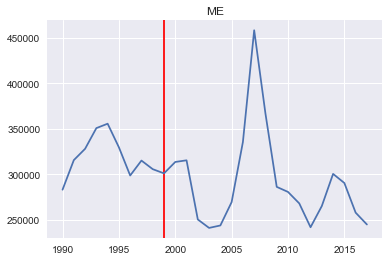

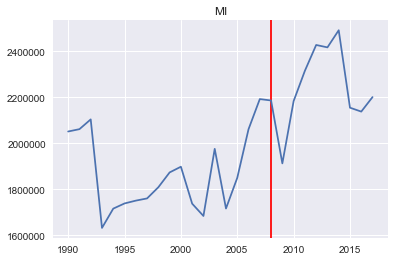

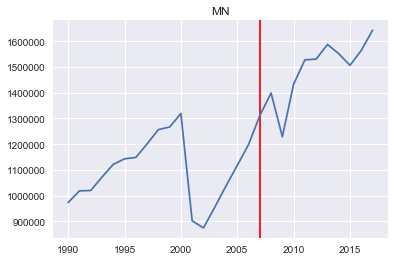

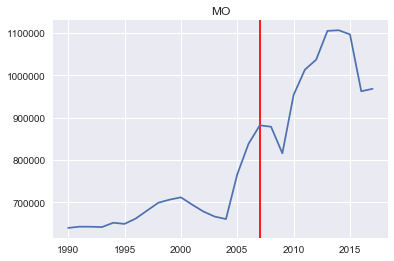

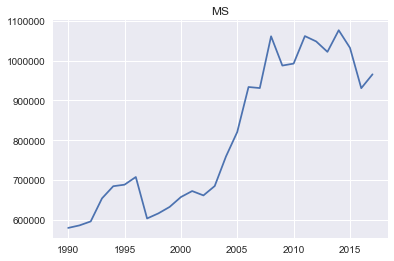

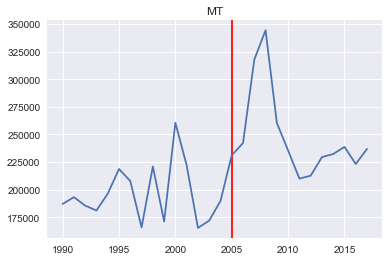

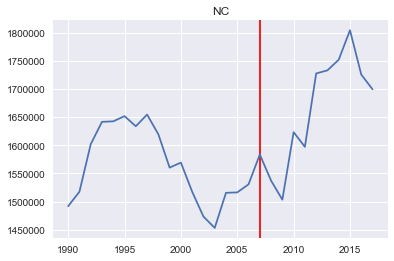

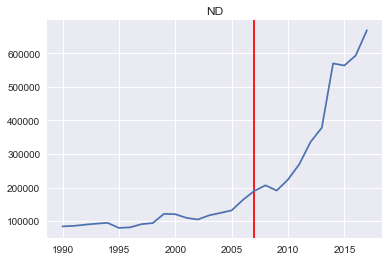

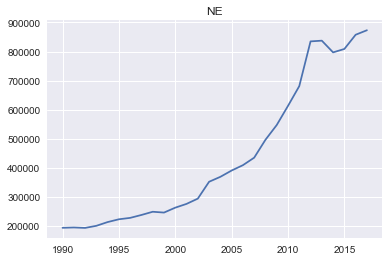

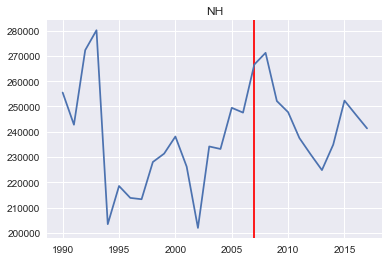

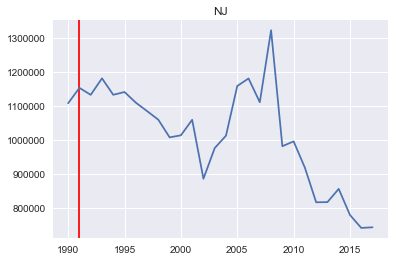

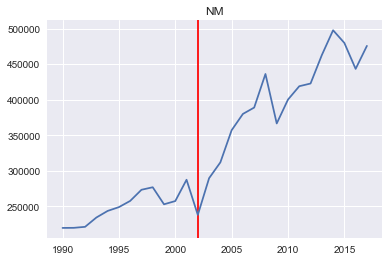

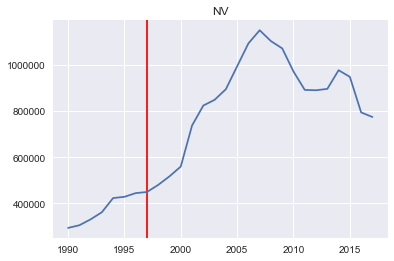

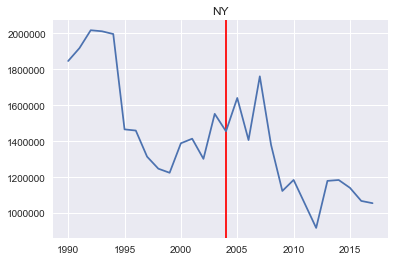

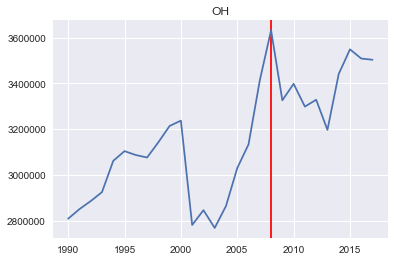

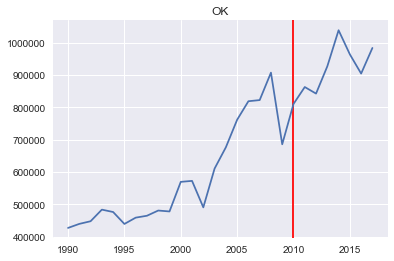

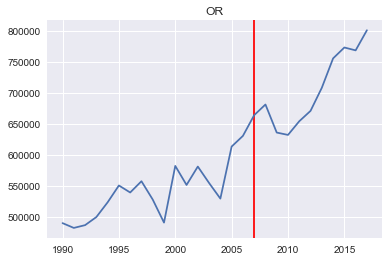

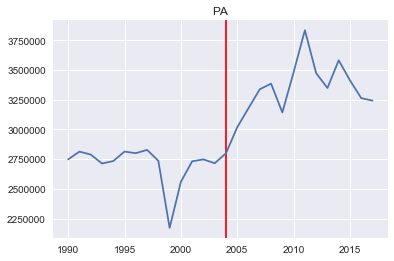

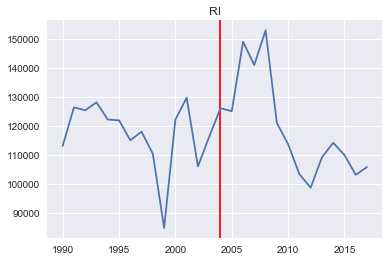

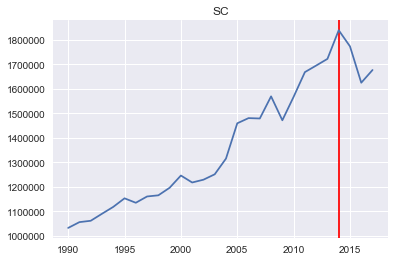

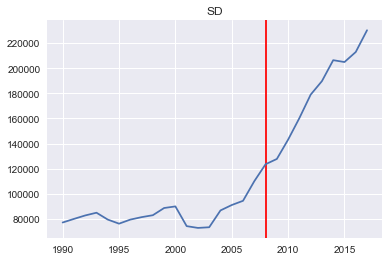

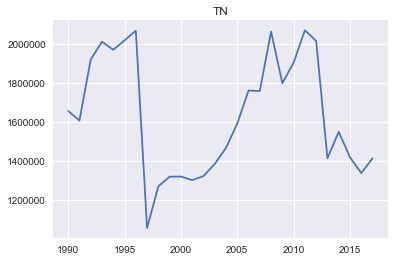

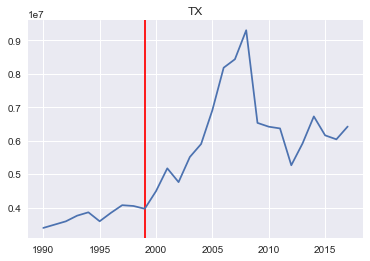

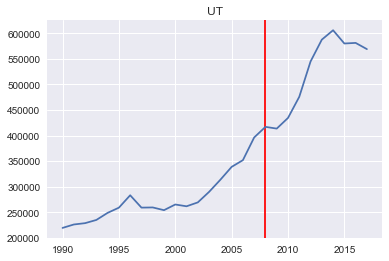

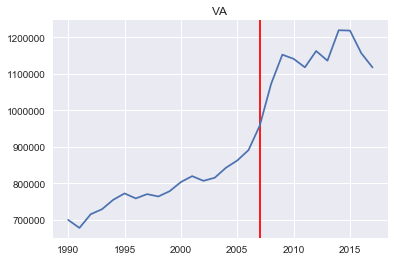

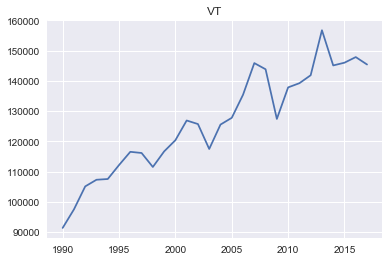

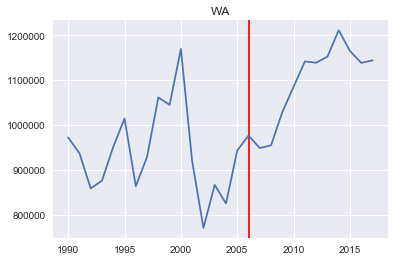

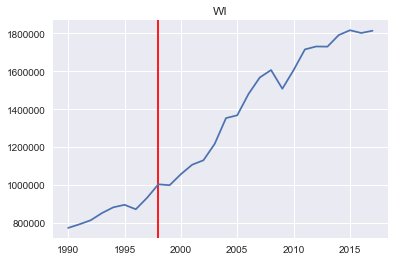

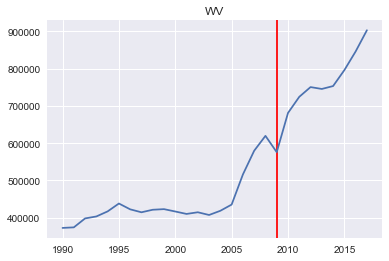

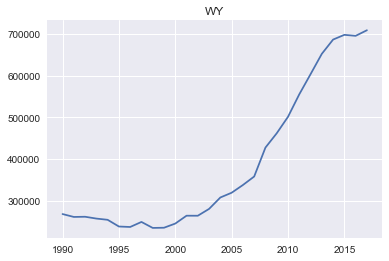

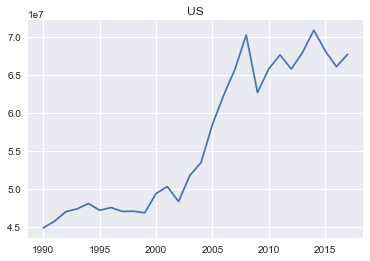

In [122]:
for state in rev["state_code"].unique():
    if state == "US":
        pass
    fullservice = rev.loc[(rev["state_code"] == state) & (rev["industry_sector"] == "Total Electric Industry")]
    plt.title(state)
    if (state in states):
        plt.axvline(states[state], color="red")
    plot = plt.plot(fullservice['year'].values, fullservice['industrial'].values)
    plt.show(plot)